# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Loop cities dataframe, pulling API data for each iteration
cities = pd.DataFrame(cities)
weatherResults = []
url = "http://api.openweathermap.org/data/2.5/weather"

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities.iterrows(): 
    params = {
        "q": city[1][0],
        "appid": weather_api_key,
        "units": 'imperial',
    }
    
    print(f"Processing Record {city[0]} of Set 1 | {city[1][0]}")
    results = requests.get(url, params=params).json()
    weatherResults.append(results)
    time.sleep(.5)

essing Record 133 of Set 1 | padang
Processing Record 134 of Set 1 | sakakah
Processing Record 135 of Set 1 | leningradskiy
Processing Record 136 of Set 1 | port lincoln
Processing Record 137 of Set 1 | shubarkuduk
Processing Record 138 of Set 1 | luderitz
Processing Record 139 of Set 1 | burnie
Processing Record 140 of Set 1 | severo-kurilsk
Processing Record 141 of Set 1 | plackovci
Processing Record 142 of Set 1 | calabozo
Processing Record 143 of Set 1 | chagda
Processing Record 144 of Set 1 | tirumullaivasal
Processing Record 145 of Set 1 | kununurra
Processing Record 146 of Set 1 | kailua
Processing Record 147 of Set 1 | sao filipe
Processing Record 148 of Set 1 | puerto ayora
Processing Record 149 of Set 1 | poum
Processing Record 150 of Set 1 | geraldton
Processing Record 151 of Set 1 | matara
Processing Record 152 of Set 1 | xihe
Processing Record 153 of Set 1 | palauig
Processing Record 154 of Set 1 | deputatskiy
Processing Record 155 of Set 1 | shizunai
Processing Record 156

In [5]:
cities[0]

0             hobart
1              ancud
2       puerto ayora
3           glendive
4      maarianhamina
           ...      
614        newmarket
615         oksfjord
616     saint-joseph
617        roebourne
618          goundam
Name: 0, Length: 619, dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.

* Display the DataFrame

In [11]:
# Covert to dataframe
weatherResultsDF = pd.DataFrame(weatherResults)
# Export to CSV
weatherResultsDF.to_csv('C:/temp/weatherData.csv')
# Clean data of any rows with nulls
weatherResultsDF = weatherResultsDF.dropna(how="all")
# Display cleaned data
weatherResultsDF.head()

,coord,weather,base,main,wind,clouds,dt,sys,timezone,id,name,cod,visibility,rain,message,snow
0,"{'lon': 20.04, 'lat': -34.53}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 55.08, 'feels_like': 54.45, 'temp_min...","{'speed': 1.12, 'deg': 240}",{'all': 80},1.580172e+09,"{'type': 1, 'id': 1966, 'country': 'ZA', 'sunr...",7200.0,1015776.0,Bredasdorp,200,NaN,NaN,NaN,NaN
1,"{'lon': 152.92, 'lat': -31.43}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 89.17, 'feels_like': 94.59, 'temp_min...","{'speed': 4.7, 'deg': 320}",{'all': 0},1.580172e+09,"{'type': 1, 'id': 9610, 'country': 'AU', 'sunr...",39600.0,2152659.0,Port Macquarie,200,10000.0,NaN,NaN,NaN
2,"{'lon': 172.79, 'lat': 3.07}","[{'id': 500, 'main': 'Rain', 'description': 'l...",model,"{'temp': 84.58, 'feels_like': 83.82, 'temp_min...","{'speed': 21.39, 'deg': 53}",{'all': 54},1.580172e+09,"{'country': 'KI', 'sunrise': 1580150523, 'suns...",43200.0,2110227.0,Butaritari,200,NaN,{'3h': 1.81},NaN,NaN
3,"{'lon': -71.14, 'lat': 21.46}","[{'id': 500, 'main': 'Rain', 'description': 'l...",model,"{'temp': 76.46, 'feels_like': 79.5, 'temp_min'...","{'speed': 5.37, 'deg': 59}",{'all': 0},1.580172e+09,"{'country': 'TC', 'sunrise': 1580124217, 'suns...",-18000.0,3576994.0,Cockburn Town,200,NaN,{'3h': 1.13},NaN,NaN
4,"{'lon': -156.47, 'lat': 20.89}","[{'id': 801, 'main': 'Clouds', 'description': ...",stations,"{'temp': 79.2, 'feels_like': 72.03, 'temp_min'...","{'speed': 14.99, 'deg': 80, 'gust': 23.04}",{'all': 20},1.580172e+09,"{'type': 1, 'id': 7879, 'country': 'US', 'sunr...",-36000.0,5847411.0,Kahului,200,16093.0,NaN,NaN,NaN


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

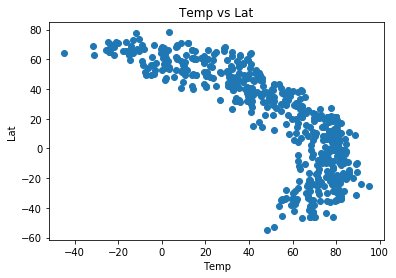

In [18]:
# Define list containers for data
x = []
y = []

# Loop over dataframe, populating x and y lists with values from specific fields
for index,weatherResult in weatherResultsDF.iterrows(): 
    try:
        x.append(weatherResultsDF['main'][index]['temp'])
        y.append(weatherResultsDF['coord'][index]['lat'])   
    except Exception:
        continue

# Build and show chart
plt.scatter(x, y, marker="o")
plt.title('Temp vs Lat')
plt.xlabel('Temp')
plt.ylabel('Lat')
plt.show()




#### Latitude vs. Humidity Plot

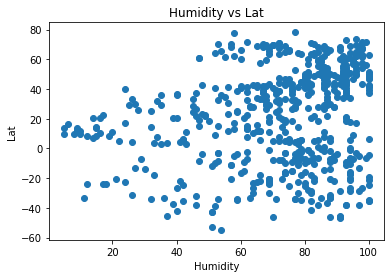

In [8]:
# Define list containers for data
x = []
y = []

# Loop over dataframe, populating x and y lists with values from specific fields
for index,weatherResult in weatherResultsDF.iterrows(): 
    try:
        x.append(weatherResultsDF['main'][index]['humidity'])
        y.append(weatherResultsDF['coord'][index]['lat'])   
    except Exception:
        continue

# Build and show chart   
plt.scatter(x, y, marker="o")
plt.title('Humidity vs Lat')
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.show()

#### Latitude vs. Cloudiness Plot

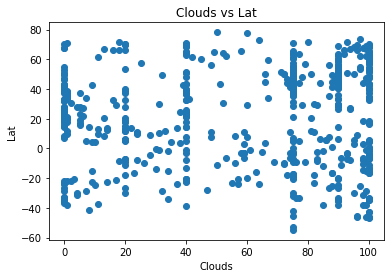

In [9]:
# Define list containers for data
x = []
y = []

# Loop over dataframe, populating x and y lists with values from specific fields
for index,weatherResult in weatherResultsDF.iterrows(): 
    try: 
        x.append(weatherResultsDF['clouds'][index]['all'])
        y.append(weatherResultsDF['coord'][index]['lat'])  
    except Exception:
        continue

# Build and show chart
plt.scatter(x, y, marker="o")
plt.title('Clouds vs Lat')
plt.xlabel('Clouds')
plt.ylabel('Lat')
plt.show()

#### Latitude vs. Wind Speed Plot

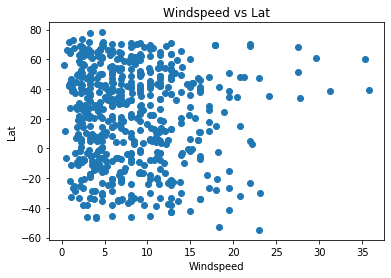

In [10]:
# Define list containers for data
x = []
y = []

# Loop over dataframe, populating x and y lists with values from specific fields
for index,weatherResult in weatherResultsDF.iterrows(): 
    try:
        x.append(weatherResultsDF['wind'][index]['speed'])
        y.append(weatherResultsDF['coord'][index]['lat'])   
    except Exception:
        continue

# Build and show chart
plt.scatter(x, y, marker="o")
plt.title('Windspeed vs Lat')
plt.xlabel('Windspeed')
plt.ylabel('Lat')
plt.show()

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [137]:
# Create Northern and Southern Hemisphere DataFrames

nHem = []
sHem = []

for index,weatherResult in weatherResultsDF.iterrows(): 
    try:
        if weatherResultsDF['coord'][index]['lat'] >= 0:
            nHem.append(weatherResultsDF['coord'][index]['lat'])
        else:
            sHem.append(weatherResultsDF['coord'][index]['lat'])
    except Exception:
        continue

nHem = pd.Series(nHem)


,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod,snow,rain,message


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

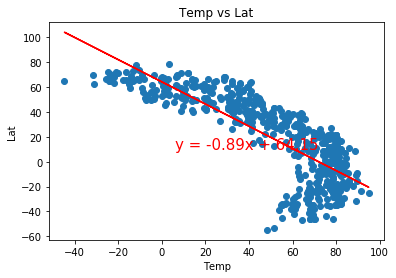

In [19]:

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()

# Define list containers for data
x = []
y = []

# Loop over dataframe, populating x and y lists with values from specific fields
for index,weatherResult in weatherResultsDF.iterrows(): 
    try:
        x.append(weatherResultsDF['main'][index]['temp'])
        y.append(weatherResultsDF['coord'][index]['lat'])   
    except Exception:
        continue

# Build and show chart
x = pd.Series(x)
y = pd.Series(y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker="o")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Temp vs Lat')
plt.xlabel('Temp')
plt.ylabel('Lat')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [27]:
pd.Series(x)

0      57.60
1      68.00
2      80.22
3      31.15
4      39.20
       ...  
566    33.04
567     8.15
568    70.79
569    86.32
570    84.58
Length: 571, dtype: float64

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression